### Comprehensive Analysis of PM2.5 Trends and Air Quality Monitoring Gaps: A Geospatial and Temporal Study (Jan-Nov 2024)"

#### Objectives
1. Analyze Temporal Trends in PM2.5 Levels

- Determine the daily, weekly, monthly, quarterly, and yearly averages of PM2.5 concentrations.
- Identify periods of significant variation, including spikes or dips, in PM2.5 levels.
- Investigate seasonal patterns and correlations with potential influencing factors such as weather or human activity.

2. Assess Data Collection Gaps

- Identify and quantify periods when monitors were not collecting data.
- Analyze the duration and frequency of these gaps and their potential impact on overall analysis.
- Provide recommendations to minimize future data collection gaps.

3. Map the Geographic Distribution of Monitoring Locations

- Visualize the spatial locations of all monitors using their latitude and longitude.
- Analyze the distribution of monitoring stations to ensure adequate spatial coverage for air quality assessment.
- Highlight areas with insufficient or no monitoring coverage.

4. Evaluate Spatial Trends in PM2.5 Levels

- Compare PM2.5 levels across different monitoring locations to identify hotspots or areas with consistently higher or lower air pollution.
- Investigate potential sources of pollution in identified hotspots.

5. Quantify PM2.5 Exposure for Public Health Implications

- Estimate the duration and intensity of PM2.5 exposure in different locations.
- Highlight areas and time periods where PM2.5 levels exceeded safe limits (e.g., WHO guidelines).
- Provide insights for public health interventions and awareness campaigns.

6. Assess Monitor Reliability and Performance

- Evaluate the performance of individual monitoring stations by analyzing data consistency and frequency of collection gaps.
- Identify stations that require maintenance or replacement.

7. Support Decision-Making for Air Quality Improvements

- Provide actionable insights for policymakers and stakeholders to develop targeted interventions.
- Recommend strategies for reducing PM2.5 levels in high-pollution areas.
- Offer suggestions for optimizing the placement of future monitoring stations.

8. Generate Predictive Insights

- Use the dataset to develop predictive models for PM2.5 levels based on historical data.
- Predict high-risk periods or locations to enable proactive mitigation efforts.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Loading Datasets (January- November 2024)
file_paths = [
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_jan-mar_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_April_June_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_July_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NairobiAQAugust2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_Sep_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_oct_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_Nov_2024.csv"
]

dataframes = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig') 
        dataframes.append(df)
    except UnicodeDecodeError:

        df = pd.read_csv(file_path, encoding='latin1')
        dataframes.append(df)

combined_df = pd.concat(dataframes, axis=0, ignore_index=True)



### Data Understanding

In [3]:
# Printing the first 5 rows of the dataset
print(combined_df.head())
print(f"Combined dataset contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")


                 timestamp  Month     display_name  longitude  latitude  \
0  2024-03-31 22:00:00 UTC  March          Langata  36.741783 -1.338275   
1  2024-03-31 22:00:00 UTC  March          Langata  36.741783 -1.338275   
2  2024-03-31 22:00:00 UTC  March  Nairobi Central  36.821671 -1.287094   
3  2024-03-31 22:00:00 UTC  March  Nairobi Central  36.821671 -1.287094   
4  2024-03-31 22:00:00 UTC  March        Baba Dogo  36.886487 -1.243396   

     pm2_5  
0   8.8498  
1   8.8498  
2   9.3353  
3   9.3353  
4  14.8182  
Combined dataset contains 260055 rows and 6 columns.


In [4]:
# Checking data information
print("INFO")
print("-" * 4)
combined_df.info()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260055 entries, 0 to 260054
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     260055 non-null  object 
 1   Month         260055 non-null  object 
 2   display_name  260055 non-null  object 
 3   longitude     260055 non-null  float64
 4   latitude      260055 non-null  float64
 5   pm2_5         259097 non-null  float64
dtypes: float64(3), object(3)
memory usage: 11.9+ MB


In [5]:
# Find the shape of the DataFrame
data_shape = combined_df.shape

# Print the shape
print("Data Shape:", data_shape)
print("Number of Rows:", data_shape[0])
print("Number of Columns:", data_shape[1])

Data Shape: (260055, 6)
Number of Rows: 260055
Number of Columns: 6


In [6]:
# Columns
print("\n\nCOLUMNS")
print("-" * 6)
print("Columns in the dataset are:")
for idx in combined_df.columns:
    print(f"- {idx}")



COLUMNS
------
Columns in the dataset are:
- timestamp
- Month
- display_name
- longitude
- latitude
- pm2_5


In [7]:
# Unique Values
print("\n\nUNIQUE VALUES")
print("-" * 12)
for col in combined_df.columns:
    print(f"Column *{col}* has {combined_df[col].nunique()} unique values")
    if combined_df[col].nunique() < 12:
        print(f"Top unique values in the *{col}* include:")
        for idx in combined_df[col].value_counts().index:
            print(f"- {idx}")
    print("")



UNIQUE VALUES
------------
Column *timestamp* has 6566 unique values

Column *Month* has 11 unique values
Top unique values in the *Month* include:
- November
- October
- September
- August
- June
- July
- January
- February
- April
- May
- March

Column *display_name* has 31 unique values

Column *longitude* has 31 unique values

Column *latitude* has 31 unique values

Column *pm2_5* has 94703 unique values



In [8]:
combined_df.describe()

,longitude,latitude,pm2_5
count,260055.000000,260055.000000,259097.000000
mean,36.850519,-1.277356,19.113829
std,0.070687,0.029042,13.124416
min,36.701270,-1.338275,1.000000
25%,36.812150,-1.298910,12.148300
50%,36.830761,-1.280720,15.889200
75%,36.890620,-1.258870,21.509300
max,37.088450,-1.224292,185.931500


In [9]:
# Missing or Null Values
print("\nMISSING VALUES")
print("-" * 15)
for col in combined_df.columns:
    print(f"Column *{col}* has {combined_df[col].isnull().sum()} missing values.")


MISSING VALUES
---------------
Column *timestamp* has 0 missing values.
Column *Month* has 0 missing values.
Column *display_name* has 0 missing values.
Column *longitude* has 0 missing values.
Column *latitude* has 0 missing values.
Column *pm2_5* has 958 missing values.


Comments
1. The columns are in the correct data type except timestamp... it will be converted into date time 
2. pm2_5 column has 958 missing values of which they will be filled by finding the mean.
3. The std of the pm2.5 is quite high and outliers will be investigated and removed.

### Data Cleaning & Feature engineering

In [10]:
#converting time_stamp into date time
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

In [11]:
# Find the records with missing values in the column
combined_df[combined_df['pm2_5'].isnull() == True].shape[0]

958

In [12]:
# Replace missing values with the mean for each monitor by month
combined_df['pm2_5'] = combined_df.groupby(['display_name', 'Month'])['pm2_5'].transform(lambda x: x.fillna(x.mean()))


In [13]:
# Verify that there are no missing values left
missing_count_after = combined_df['pm2_5'].isnull().sum()
print(f"Number of missing values in 'pm2.5' after filling: {missing_count_after}")

Number of missing values in 'pm2.5' after filling: 0


Now checking the outliers

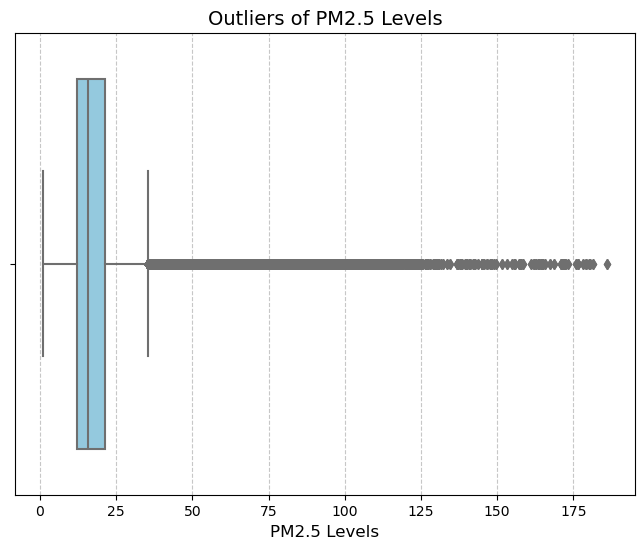

In [14]:
# Box plot for PM2.5 to highlight outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_df['pm2_5'], color='skyblue')
plt.title('Outliers of PM2.5 Levels', fontsize=14)
plt.xlabel('PM2.5 Levels', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

According to the boxplot, outliers are evident and the next course of action will be to remove them. This will help to improve the linearity and nomarlity of the data

Removing outliers

In [15]:
# Function to find upper and lower limits for PM2.5
def find_outlier_limits_pm2_5(column, num_std=3):
    mean = np.mean(column)
    std_dev = np.std(column)
    lower_limit = mean - num_std * std_dev
    upper_limit = mean + num_std * std_dev
    return lower_limit, upper_limit

# Function to remove outliers from the PM2.5 column
def remove_pm2_5_outliers(combined_df, num_std=3):
    # Calculate limits
    lower_limit, upper_limit = find_outlier_limits_pm2_5(combined_df['pm2_5'], num_std)
    print(f"PM2.5 Outlier Limits\n-------------------\nLower Limit: {lower_limit}, Upper Limit: {upper_limit}")
    
    # Identify outliers
    outliers_mask = (combined_df['pm2_5'] < lower_limit) | (combined_df['pm2_5'] > upper_limit)
    outliers_removed = combined_df[outliers_mask].shape[0]
    print(f"Outliers removed: {outliers_removed}")
    
    # Filter out the outliers
    filtered_data = combined_df[~outliers_mask]
    return filtered_data

# Remove outliers from the PM2.5 column
clean_data = remove_pm2_5_outliers(combined_df, num_std=3)

print(f"Original data: {len(combined_df)} rows")
print(f"Filtered data: {len(clean_data)} rows")

PM2.5 Outlier Limits
-------------------
Lower Limit: -20.205704644650996, Upper Limit: 58.41980991590387
Outliers removed: 4848
Original data: 260055 rows
Filtered data: 255207 rows


### Data Visualization

#### Mean for each location

In [16]:
# Group the data by location and calculate the mean pm2.5 for each location
location_pm =combined_df.groupby('display_name')['pm2_5'].mean().reset_index()

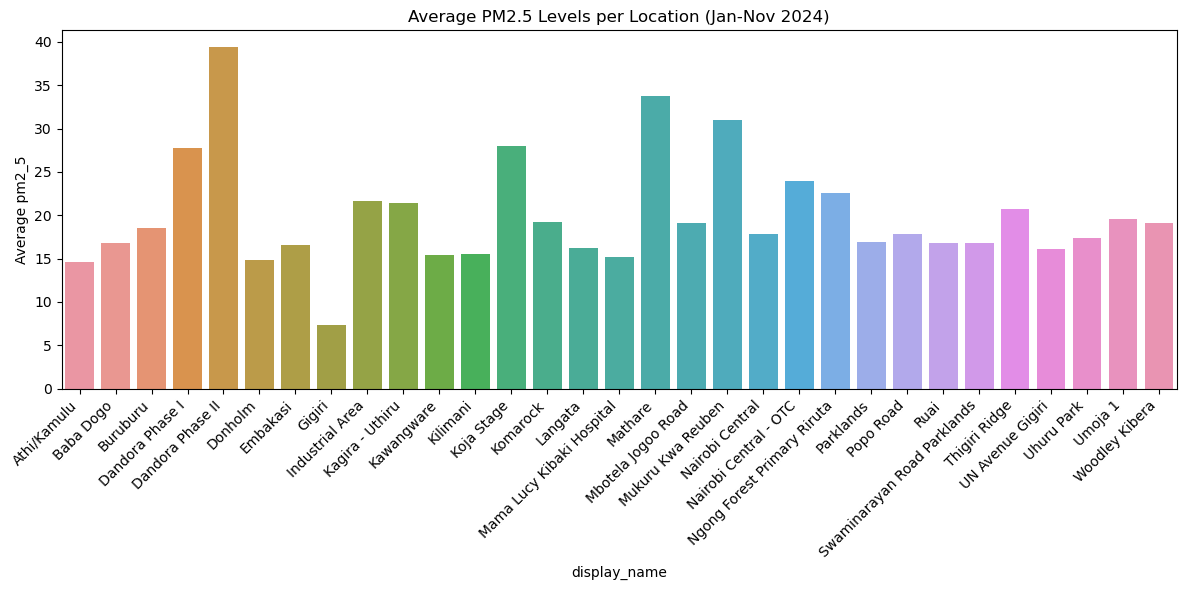

In [17]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='display_name', y='pm2_5', data=location_pm)

# Add labels and title
plt.title('Average PM2.5 Levels per Location (Jan-Nov 2024)')
plt.xlabel('display_name')
plt.ylabel('Average pm2_5')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### Hourly averages in 24 hours of Nairobi City 

According to the World Health Organization (WHO), the air quality thresholds for good air based on PM2.5 (particulate matter ≤2.5 microns) are:

- Annual mean: 5 µg/m³
- 24-hour mean: 15 µg/m³

These thresholds were updated in 2021 as part of WHO's revised global air quality guidelines. Values below these limits are considered to represent good air quality that poses minimal health risks to humans.

In [18]:
# Create a mapping of display_name to subcounty
display_to_subcounty = {
    'Athi/Kamulu': 'Kasarani',
    'Baba Dogo': 'Ruaraka',
    'Buruburu': 'Makadara', 
    'Dandora Phase I': 'Embakasi North',
    'Dandora Phase II': 'Embakasi North',
    'Donholm': 'Embakasi East',
    'Embakasi': 'Embakasi East',
    'Gigiri': 'Westlands',
    'Industrial Area': 'Makadara',
    'Kagira - Uthiru': 'Dagoretti South',
    'Kawangware': 'Dagoretti South',
    'Kilimani': 'Dagoretti North',
    'Koja Stage': 'Starehe',
    'Komarock': 'Embakasi Central',
    'Langata': 'Langata',
    'Mama Lucy Kibaki Hospital': 'Embakasi West',
    'Mathare': 'Mathare',
    'Mbotela Jogoo Road': 'Makadara',
    'Mukuru Kwa Reuben': 'Embakasi South',
    'Nairobi Central': 'Starehe',
    'Nairobi Central - OTC': 'Starehe',
    'Ngong Forest Primary Riruta': 'Langata',
    'Parklands': 'Starehe',
    'Popo Road': 'Langata',
    'Ruai': 'Kasarani',
    'Swaminarayan Road Parklands': 'Starehe',
    'Thigiri Ridge': 'Westlands',
    'UN Avenue Gigiri': 'Westlands',
    'Uhuru Park': 'Dagoretti North',
    'Umoja 1': 'Embakasi West',
    'Woodley Kibera': 'Kibra',
}

In [19]:
#Map display_name to subcounty
combined_df['subcounty'] = combined_df['display_name'].map(display_to_subcounty)

In [22]:
#Extract the hour from the 'time' column
combined_df['hour'] = combined_df ['timestamp'].dt.hour 

# Group by subcounty and hour, and calculate the mean PM2.5
hourly_avg_pm2_5 = combined_df.groupby(['subcounty', 'hour'])['pm2_5'].mean().reset_index()

# Loop through each subcounty and create a separate plot
unique_subcounties = hourly_avg_pm2_5['subcounty'].unique()

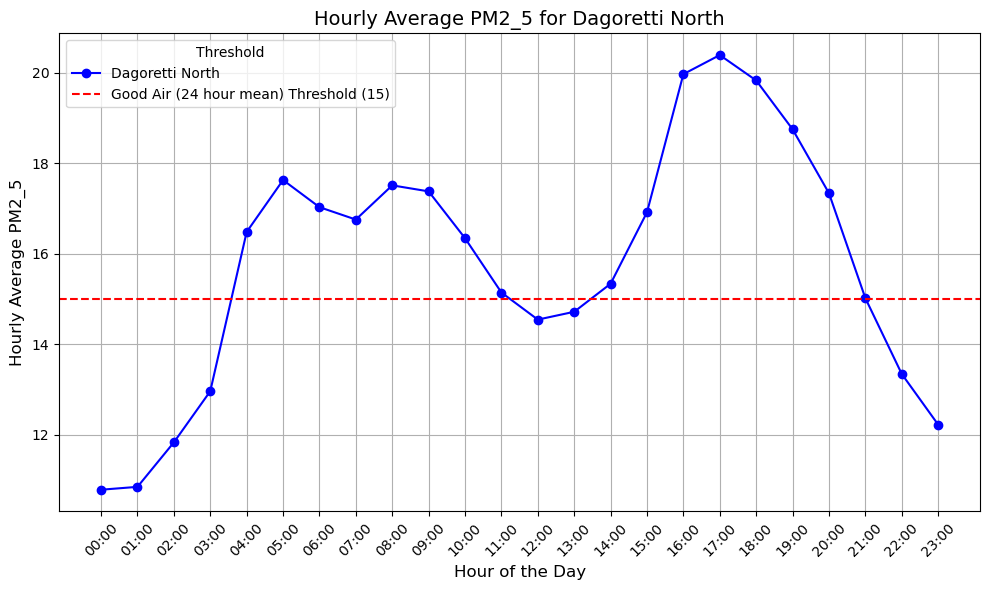

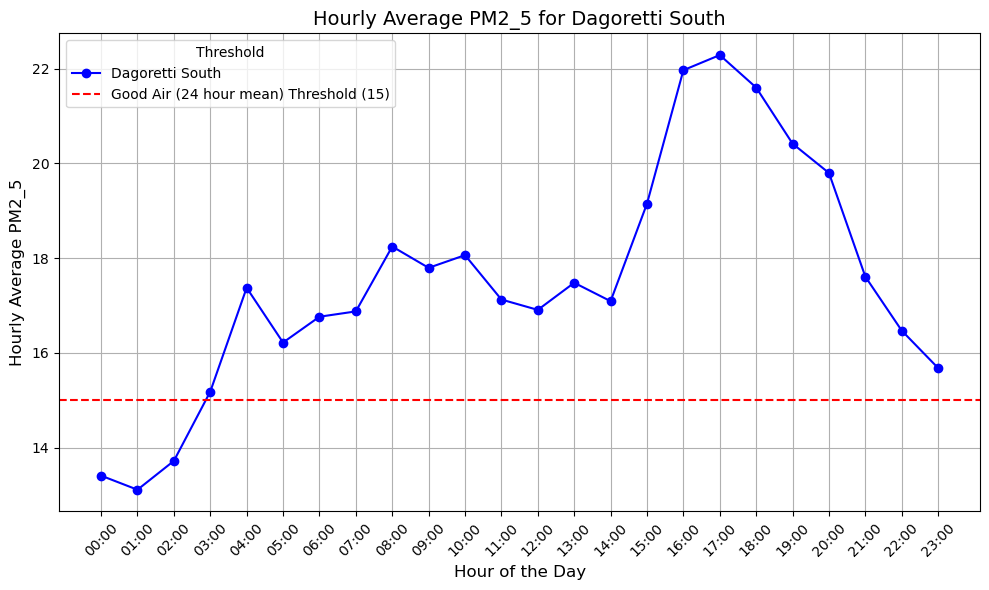

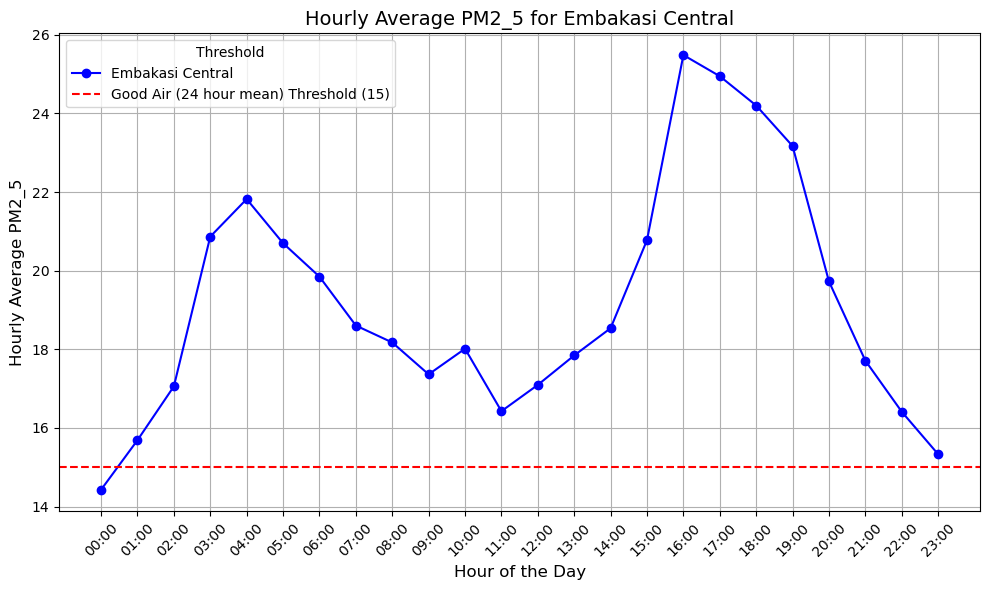

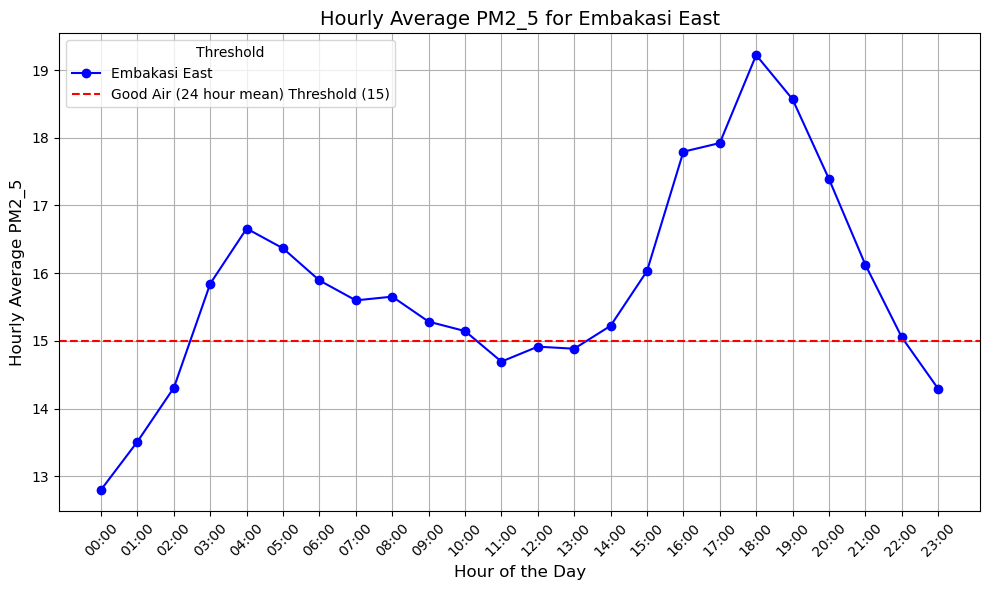

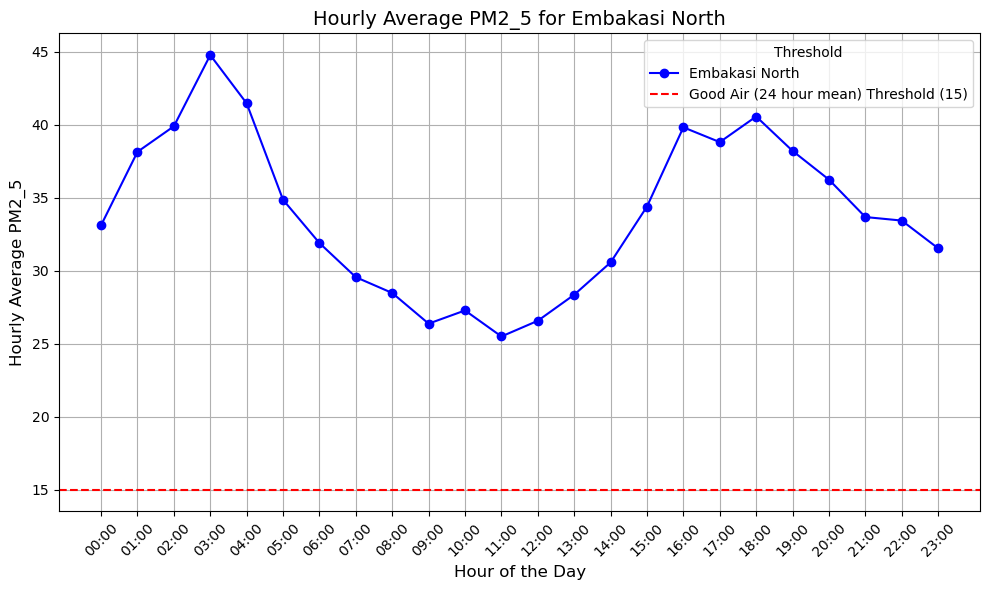

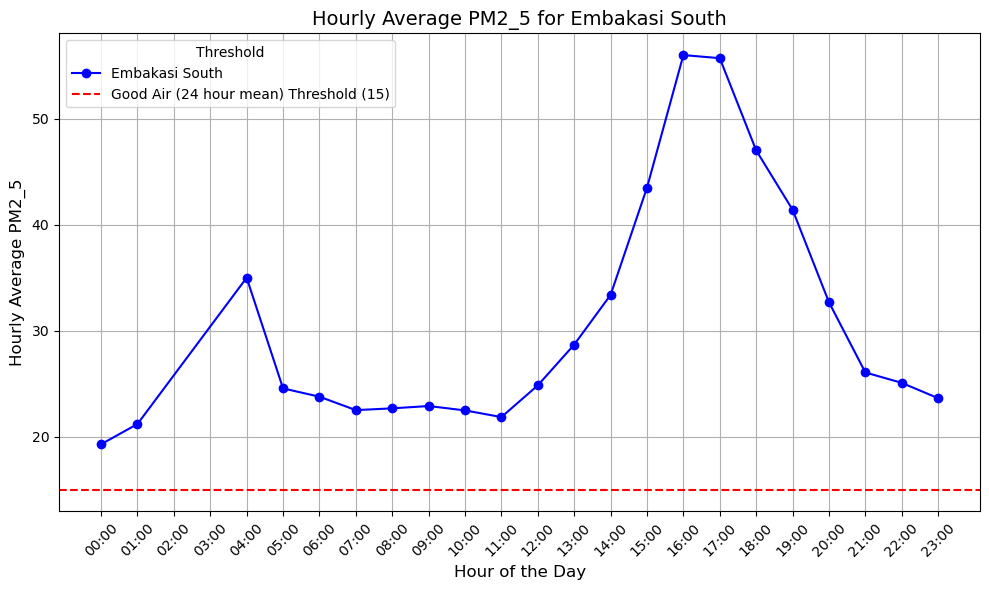

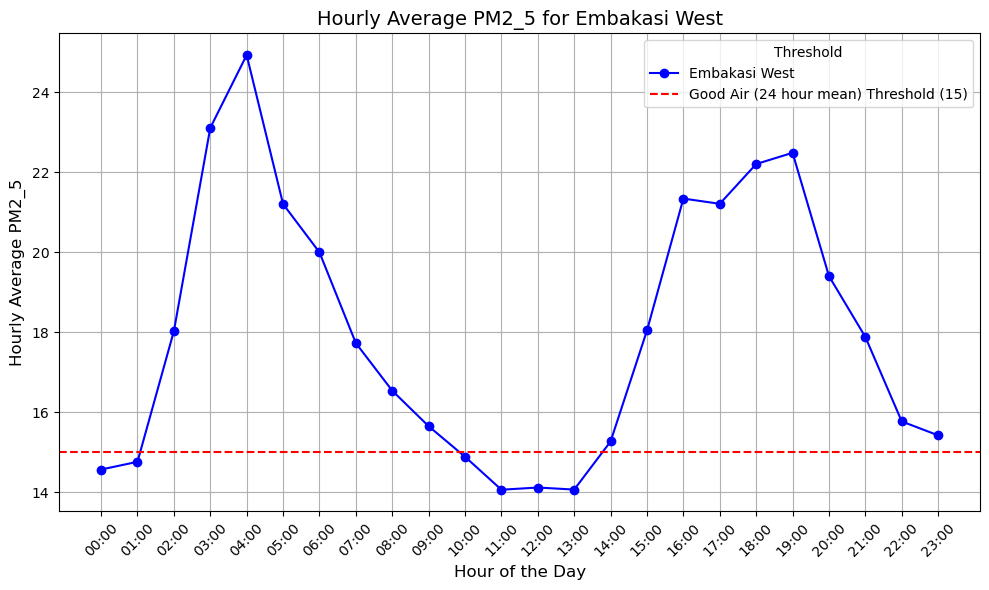

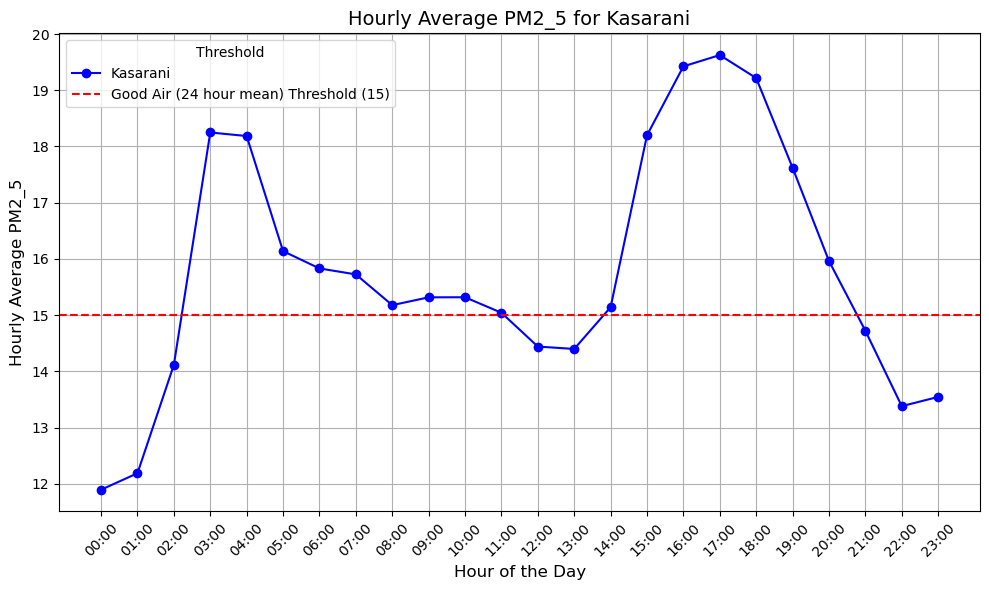

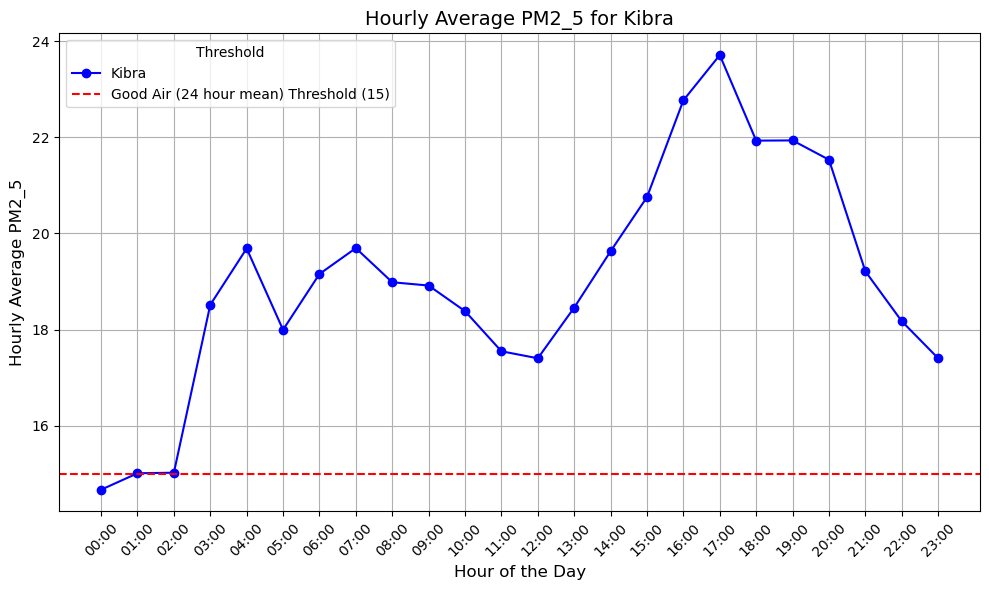

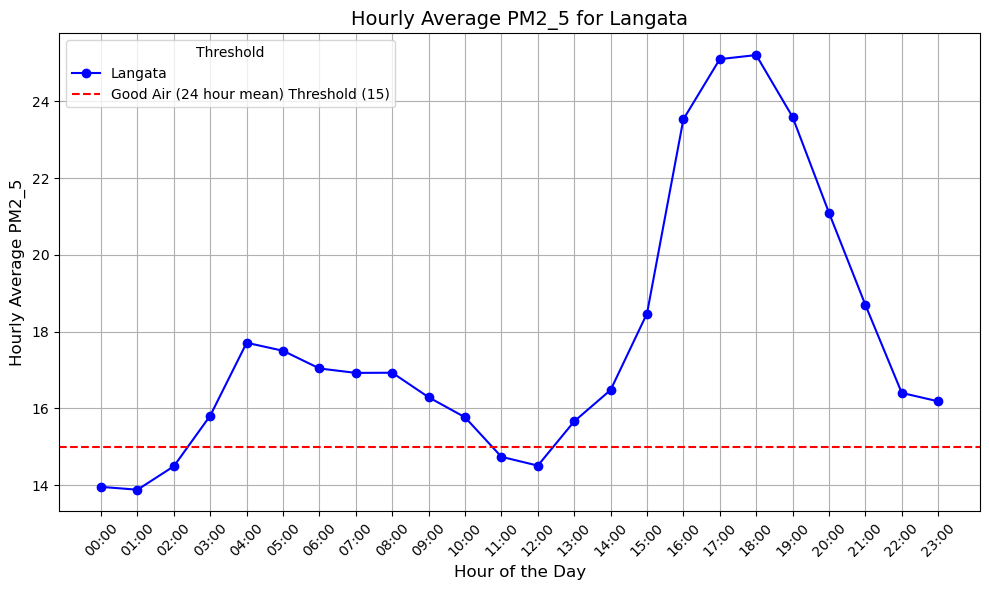

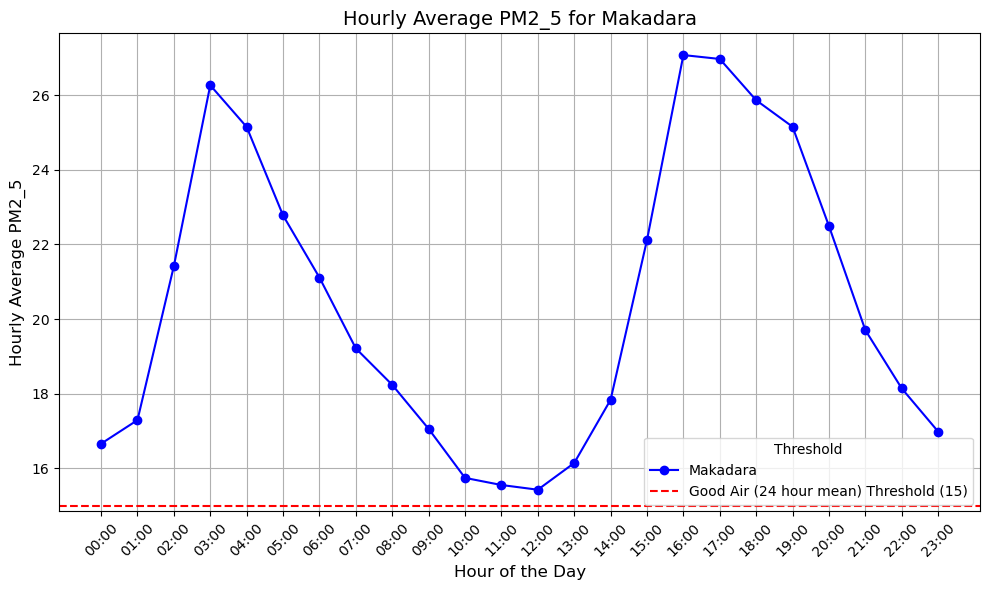

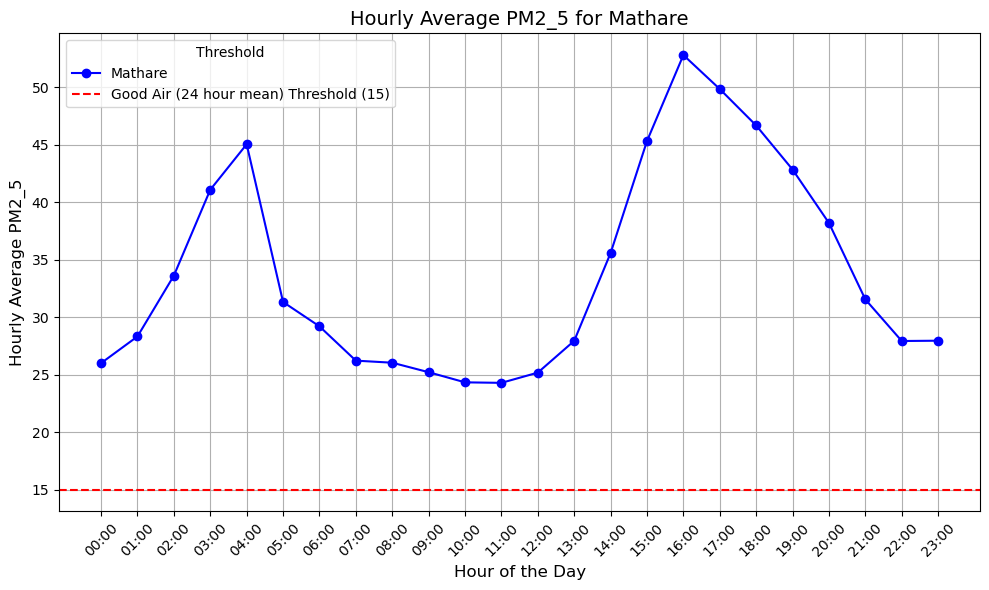

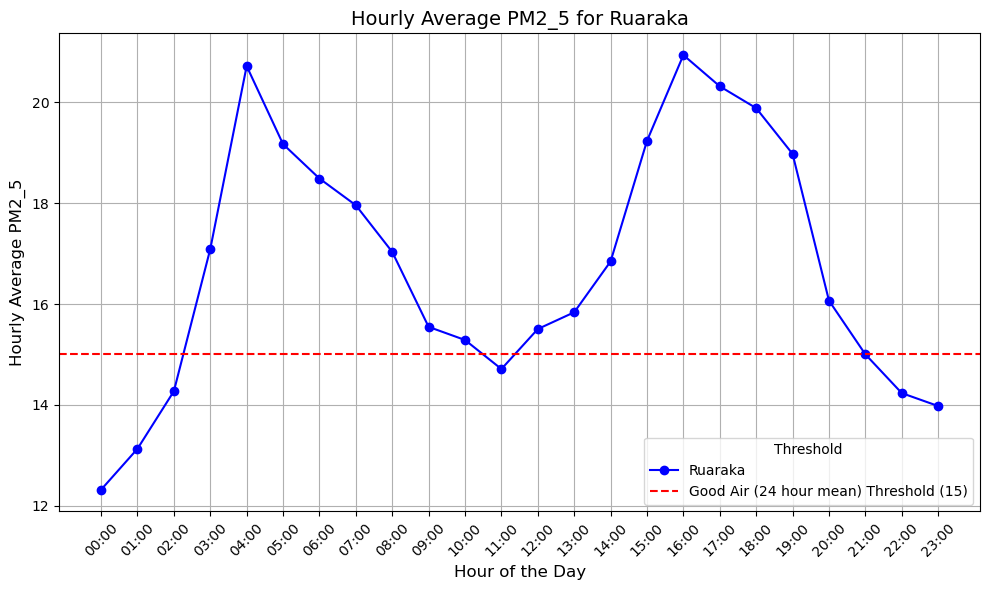

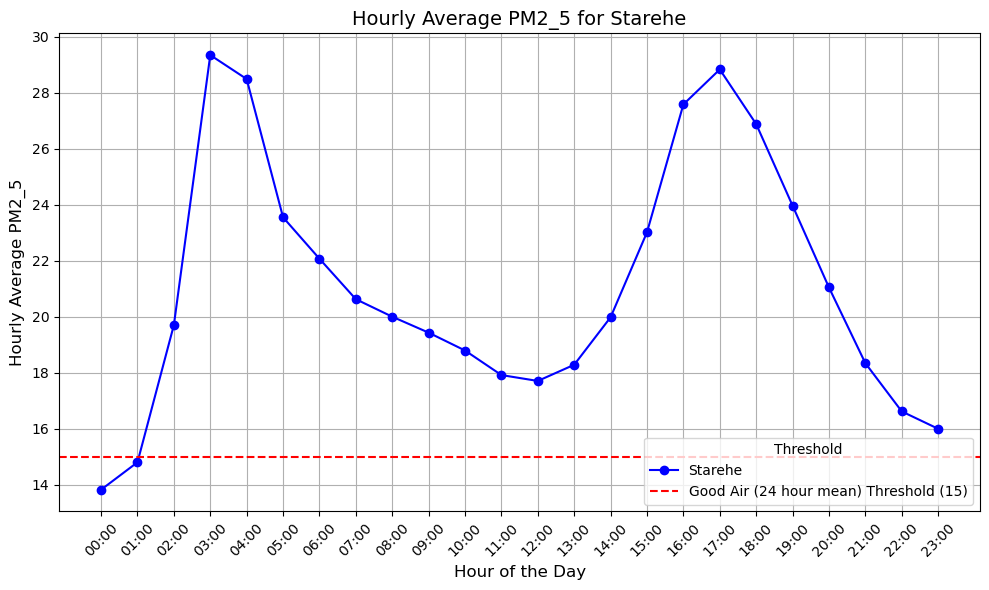

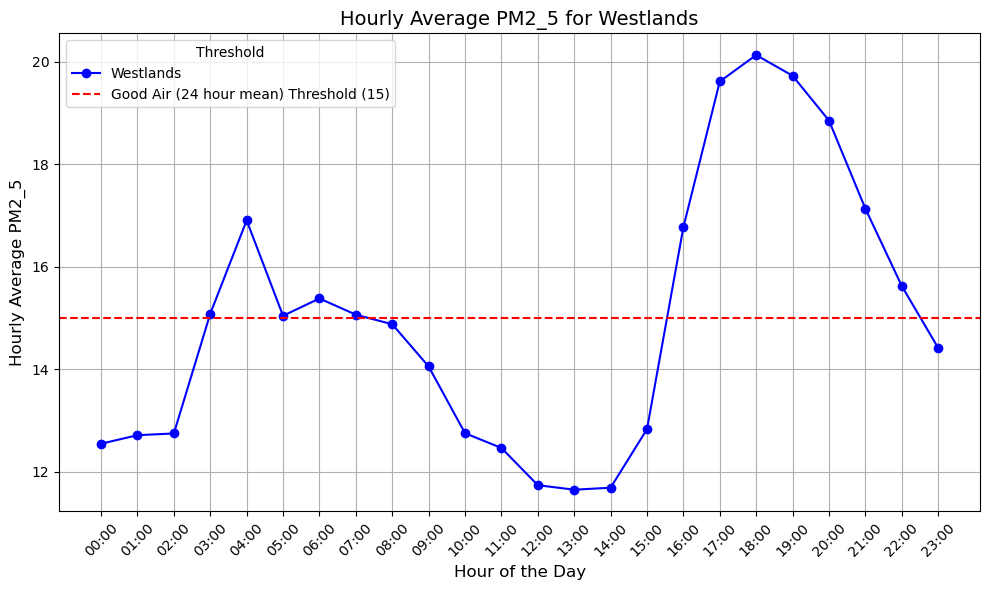

In [24]:
# Generate plots for up to 15 subcounties
for i, subcounty in enumerate(unique_subcounties[:15]): 
    # Filter data for the current subcounty
    subcounty_data = hourly_avg_pm2_5[hourly_avg_pm2_5['subcounty'] == subcounty]

    # Plotting the diurnal pattern for the subcounty
    plt.figure(figsize=(10, 6))
    plt.plot(subcounty_data['hour'], subcounty_data['pm2_5'], marker='o', color='blue', label=f'{subcounty}')
    
    # Add a horizontal line for the healthy threshold at 35.4
    plt.axhline(y=15, color='r', linestyle='--', label='Good Air (24 hour mean) Threshold (15)')
    
    # Format the x-axis to display hours in 24-hour format
    plt.xticks(ticks=range(24), labels=[f'{i:02d}:00' for i in range(24)], rotation=45)
    
    # Adding labels and title
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Hourly Average PM2_5', fontsize=12)
    plt.title(f'Hourly Average PM2_5 for {subcounty}', fontsize=14)
    
    # Adding legend
    plt.legend(title='Threshold')
    
    # Displaying grid for better readability
    plt.grid(True)
    
    # Adjust layout for clarity
    plt.tight_layout()
    
    # Show the plot
    plt.show()